In [112]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from keras import layers
from tensorflow.keras.models import Model
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [113]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [114]:
# data normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [115]:
# Change the data dimension for VGG16
x_train = np.stack([x_train]*3, axis=-1)
x_test = np.stack([x_test]*3, axis=-1)

In [116]:
# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [117]:
resized_x_train = tf.image.resize(x_train, (32,32))
resized_x_test = tf.image.resize(x_test, (32,32))

resized_x_train.shape, x_train.shape

(TensorShape([60000, 32, 32, 3]), (60000, 28, 28, 3))

In [118]:
# Build VGG16 model
def model_VGG16(learning_rate, epochs, batch_size):
    base_model = VGG16(
        include_top=False,
        weights='imagenet',
        input_shape=(32, 32, 3),
        pooling='avg'
    )

    # Adding custom layers
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.25)(x)
    predictions = layers.Dense(10, activation='softmax')(x)

    # Creating the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compilation
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Model training
    history = model.fit(
        resized_x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2
    )

    test_loss, test_accuracy = model.evaluate(resized_x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return model, history

In [119]:
# Hyperparametrs
learning_rate = 0.001
epochs = 15
batch_size = 200

In [120]:
# Train model
model, history_v2 = model_VGG16(learning_rate, epochs, batch_size)

Epoch 1/15
240/240 [==============================] - 26s 90ms/step - loss: 1.1644 - accuracy: 0.5317 - val_loss: 0.6280 - val_accuracy: 0.7690
Epoch 2/15
240/240 [==============================] - 20s 85ms/step - loss: 0.5401 - accuracy: 0.8093 - val_loss: 0.4113 - val_accuracy: 0.8613
Epoch 3/15
240/240 [==============================] - 20s 83ms/step - loss: 0.3551 - accuracy: 0.8814 - val_loss: 0.3873 - val_accuracy: 0.8633
Epoch 4/15
240/240 [==============================] - 21s 87ms/step - loss: 0.3051 - accuracy: 0.8979 - val_loss: 0.2760 - val_accuracy: 0.9081
Epoch 5/15
240/240 [==============================] - 21s 88ms/step - loss: 0.2564 - accuracy: 0.9129 - val_loss: 0.2508 - val_accuracy: 0.9154
Epoch 6/15
240/240 [==============================] - 21s 88ms/step - loss: 0.2275 - accuracy: 0.9235 - val_loss: 0.2530 - val_accuracy: 0.9162
Epoch 7/15
240/240 [==============================] - 21s 88ms/step - loss: 0.1917 - accuracy: 0.9341 - val_loss: 0.2449 - val_accuracy:

In [121]:
# Display the model summary table to see all layers and their parameters
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0  

In [123]:
import matplotlib.pyplot as plt

313/313 [==============================] - 2s 8ms/step


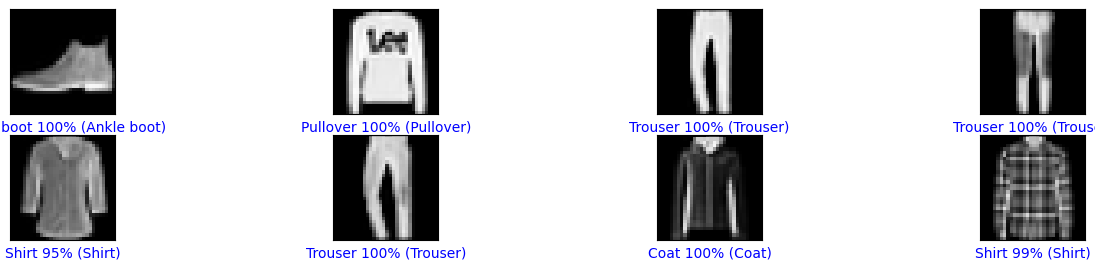

In [166]:
predictions = model.predict(resized_x_test)

def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
num_images = 8
num_rows = 2
num_cols = 4
plt.figure(figsize=(2*num_images, 3))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions[i], y_test[i], resized_x_test[i])


__Висновки__

VGG16 модель показала не погані результати 92.04% accuracy, трішки гірше за модель з першої частини яка показала результати 92.07%.